In [1]:
# from bigraph_viz import plot_bigraph, plot_flow, plot_multitimestep, pf
from bigraph_viz import plot_bigraph, replace_regex_recursive, generate_types

core = generate_types()

plot_settings = {
    'remove_process_place_edges': True
}
save_images = False
if save_images:
    plot_settings.update({'out_dir': 'out','dpi': '250'})

{'time': 'float', 'floating_species': 'map[float]', 'model_parameters': 'map[float]', 'reactions': 'map[float]'}
{'time': 'float', 'floating_species': 'map[float]'}
Writing out/utc_interface


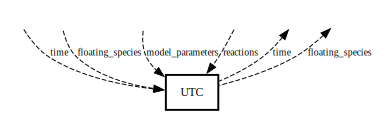

In [2]:
process = {
    'UTC': {
            '_type': 'edge',
            '_inputs': {
                'time': 'float',
                'floating_species': 'map[float]',
                'model_parameters': 'map[float]',
                'reactions': 'map[float]',
            },
            '_outputs': {
                'time': 'float',
                'floating_species': 'map[float]',
            }
        }
}
plot_bigraph(process, 
             # **plot_settings, 
             # dpi= '250',
             filename='utc_interface'
            )

In [3]:
sed_schema = {
            '_type': 'edge',
            '_inputs': {
                # 'time': 'float',
                # 'reactions': 'float',
                'model_file': '',
                'sed_instructions': '',
            },
            '_outputs': {
                'species': '',
            }
        }

sed_spec = {
    'model_file': '',
    'sed_instructions': '',
    'results': {
        'COPASI': '',
        'Tellurium': '',
        'AMICI': ''
    },
    'COPASI': {
        **sed_schema,
         'inputs': {
            'model_file': ['model_file'],
            'sed_instructions': ['sed_instructions'],
        },
        'outputs': {
             'species': ['results', 'COPASI'],
        }
    },
    'Tellurium': {
        **sed_schema,
         'inputs': {
            'model_file': ['model_file'],
            'sed_instructions': ['sed_instructions'],
        },
        'outputs': {
             'species': ['results', 'Tellurium'],
        }
    },
    'AMICI': {
        **sed_schema,
        'inputs': {
            'model_file': ['model_file'],
            'sed_instructions': ['sed_instructions'],
        },
        'outputs': {
             'species': ['results', 'AMICI'],
        }
    },
    'compare and report': {
        '_type': 'process',
        '_inputs': {
            'results': ''
        },
        'inputs': {
            'results': ['results'],
        },
        '_outputs': {
            'figure': ''
        },
        'outputs': {
            'figure': ['figures'],
        },
    }
}

In [4]:
sed_spec

{'model_file': '',
 'sed_instructions': '',
 'results': {'COPASI': '', 'Tellurium': '', 'AMICI': ''},
 'COPASI': {'_type': 'edge',
  '_inputs': {'model_file': '', 'sed_instructions': ''},
  '_outputs': {'species': ''},
  'inputs': {'model_file': ['model_file'],
   'sed_instructions': ['sed_instructions']},
  'outputs': {'species': ['results', 'COPASI']}},
 'Tellurium': {'_type': 'edge',
  '_inputs': {'model_file': '', 'sed_instructions': ''},
  '_outputs': {'species': ''},
  'inputs': {'model_file': ['model_file'],
   'sed_instructions': ['sed_instructions']},
  'outputs': {'species': ['results', 'Tellurium']}},
 'AMICI': {'_type': 'edge',
  '_inputs': {'model_file': '', 'sed_instructions': ''},
  '_outputs': {'species': ''},
  'inputs': {'model_file': ['model_file'],
   'sed_instructions': ['sed_instructions']},
  'outputs': {'species': ['results', 'AMICI']}},
 'compare and report': {'_type': 'process',
  '_inputs': {'results': ''},
  'inputs': {'results': ['results']},
  '_outputs': 

{'model_file': '', 'sed_instructions': ''}
{'species': ''}
{'model_file': '', 'sed_instructions': ''}
{'species': ''}
{'model_file': '', 'sed_instructions': ''}
{'species': ''}
{'results': ''}
{'figure': ''}
Writing out/sed_spec


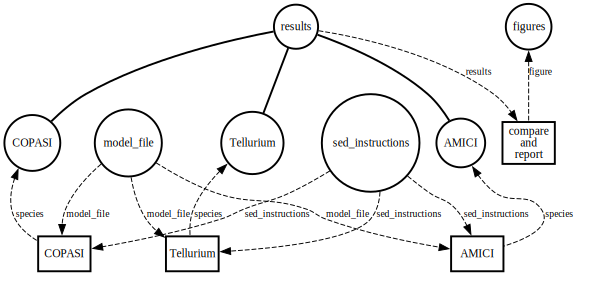

In [5]:
# plot_settings['node_groups'] = [('results',), ('model_file',)]
sed_spec = replace_regex_recursive(sed_spec)
plot_bigraph(sed_spec, 
             # **plot_settings, 
             # dpi= '250',
             filename='sed_spec')

{'model_file': '', 'sed_instructions': ''}
{'species': ''}
{}
{'port1': 'float', 'port2': 'integer'}
{'port1': 'tree'}
{}
Writing out/nested_composite


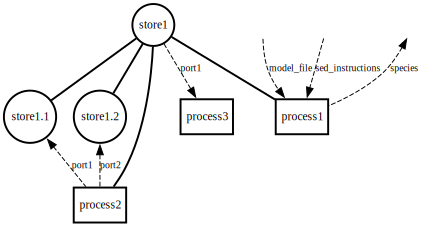

In [6]:
nested_composite_spec = {
    'store1': {
        'store1.1': 'float',
        'store1.2': 'integer',
        'process1': {**sed_schema,
                     'inputs': {
                        'port1': ['store1.1'],
                        'port2': ['store1.2'],
            }
        },
        'process2': {
            '_type': 'process',
            '_outputs': {
                'port1': 'float',
                'port2': 'integer',
            },
            'outputs': {
                'port1': ['store1.1'],
                'port2': ['store1.2'],
            }
        },
    },
    'process3': {
        '_type': 'process',
        '_inputs': {
            'port1': 'tree',
        },
        'inputs': {
            'port1': ['store1'],
        }
    }
}
plot_bigraph(nested_composite_spec, 
             # **plot_settings, 
             filename='nested_composite')

In [7]:
plot_bigraph(nested_composite_spec, 
             # **plot_settings, 
             filename='nested_composite')

{'model_file': '', 'sed_instructions': ''}
{'species': ''}
any


AttributeError: 'str' object has no attribute 'items'

{'time': 'any', 'floating_species': 'any', 'model_parameters': 'any', 'reactions': 'any'}
{'time': 'any', 'floating_species': 'any'}
{'time': 'any', 'floating_species': 'any', 'model_parameters': 'any', 'reactions': 'any'}
{'time': 'any', 'floating_species': 'any'}
{'time': 'any', 'floating_species': 'any', 'model_parameters': 'any', 'reactions': 'any'}
{'time': 'any', 'floating_species': 'any'}
{'time': 'any', 'amici_floating_species': 'any', 'copasi_floating_species': 'any', 'tellurium_floating_species': 'any'}
{'results': 'any', 'id': 'any'}
Writing out/manuscript


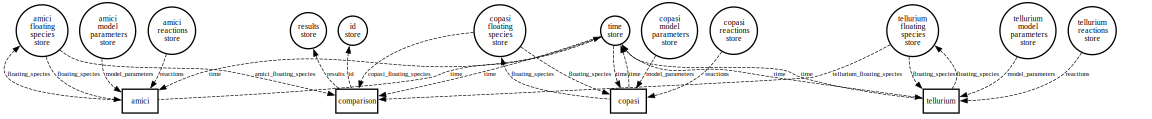

In [22]:
from bigraph_viz import plot_bigraph, replace_regex_recursive, generate_types


omex_dir = '../test_suite/examples/sbml-core/Vilar-PNAS-2002-minimal-circardian-clock-discrete-SSA'  #  Elowitz-Nature-2000-Repressilator'
omex_fp = omex_dir + '.omex'

manuscript = {
    'amici': {
        '_type': 'step',
        'address': 'local:utc-amici',
        'config': {
            'model': {
                'model_source': omex_fp
            }
        },
        '_inputs': {
            'time':  'any',
            'floating_species':  'any',
            'model_parameters':  'any',
            'reactions':  'any',
        },
        '_outputs': {
            'time':  'any',
            'floating_species':  'any',
        },
        'inputs': {
            'time': ['time store'],
            'floating_species': ['amici floating species store'],
            'model_parameters': ['amici model parameters store'],
            'reactions': ['amici reactions store']
        },
        'outputs': {
            'time': ['time store'],
            'floating_species': ['amici floating species store']
        }
    },
    'copasi': {
        '_type': 'step',
        'address': 'local:utc-copasi',
        'config': {
            'model': {
                'model_source': omex_fp
            }
        },
        '_inputs': {
            'time':  'any',
            'floating_species':  'any',
            'model_parameters':  'any',
            'reactions':  'any',
        },
        '_outputs': {
            'time':  'any',
            'floating_species':  'any',
        },
        'inputs': {
            'time': ['time store'],
            'floating_species': ['copasi floating species store'],
            'model_parameters': ['copasi model parameters store'],
            'reactions': ['copasi reactions store']
        },
        'outputs': {
            'time': ['time store'],
            'floating_species': ['copasi floating species store']
        }
    },
    'tellurium': {
        '_type': 'step',
        'address': 'local:utc-tellurium',
        'config': {
            'model': {
                'model_source': omex_fp
            }
        },
        '_inputs': {
            'time':  'any',
            'floating_species':  'any',
            'model_parameters':  'any',
            'reactions':  'any',
        },
        '_outputs': {
            'time':  'any',
            'floating_species':  'any',
        },
        'inputs': {
            'time': ['time store'],
            'floating_species': ['tellurium floating species store'],
            'model_parameters': ['tellurium model parameters store'],
            'reactions': ['tellurium reactions store']
        },
        'outputs': {
            'time': ['time store'],
            'floating_species': ['tellurium floating species store']
        }
    },
    'comparison': {
        '_type': 'step',
        'address': 'local:utc-comparator',
        'config': {
            'simulators': ['amici', 'copasi', 'tellurium'],
        },
        '_inputs': {
            'time': 'any',
            'amici_floating_species':'any',
            'copasi_floating_species': 'any',
            'tellurium_floating_species': 'any',
        },
        '_outputs': {
            'results': 'any',
            'id': 'any',
        },
        'inputs': {
            'time': ['time store'],
            'amici_floating_species': ['amici floating species store'],
            'copasi_floating_species': ['copasi floating species store'],
            'tellurium_floating_species': ['tellurium floating species store'],
        },
        'outputs': {
            'results': ['results store'],
            'id': ['id store']
        }
    },
}

manuscript = replace_regex_recursive(manuscript)
plot_bigraph(manuscript, 
             # **plot_settings, 
             # dpi= '250',
             filename='manuscript')

{'model_file': 'any', 'sed_instructions': 'any'}
{'results': 'any', 'id': 'any'}
{'time': 'any', 'floating_species': 'any', 'model_parameters': 'any', 'reactions': 'any'}
{'time': 'any', 'floating_species': 'any'}
{'time': 'any', 'floating_species': 'any', 'model_parameters': 'any', 'reactions': 'any'}
{'time': 'any', 'floating_species': 'any'}
{'time': 'any', 'floating_species': 'any', 'model_parameters': 'any', 'reactions': 'any'}
{'time': 'any', 'floating_species': 'any'}
{'time': 'any', 'amici_floating_species': 'any', 'copasi_floating_species': 'any', 'tellurium_floating_species': 'any'}
{'results': 'any', 'id': 'any'}
Writing out/verification


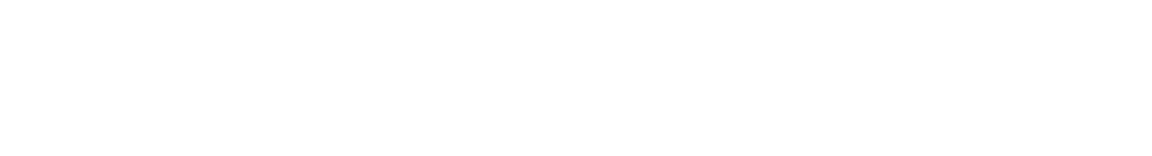

In [24]:
# output_bridge = {
#     'inputs': {
#         'results': ['results_store'],
#         'id': ['id_store']
#     },
#     'outputs': {
#         'results': ['results_store'],
#         'id': ['id_store']
#     }
# }

super_process = {
    'verificationAPI': {
        '_type': 'composite',
        '_inputs': {
            'model_file': 'any',
            'sed_instructions': 'any',
        },
        '_outputs': {
            'results': 'any',
            'id': 'any',
        },
        'inputs': {},
        'outputs': {},
        'bridge': {
            'inputs': {
                'results': ['results store'],
                'id': ['id store']
            },
            'outputs': {
                'results': ['results store'],
                'id': ['id store']
            }
        },
        **manuscript
    }
}

super_process = replace_regex_recursive(super_process)
plot_bigraph(super_process, 
             # **plot_settings, 
             dpi= '250',
             filename='verification')